In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pickle
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Codificación - Categóricas Ordinales

In [ ]:
mapeo_ordinal = {
    'a. no tiene': 1,
    'b. tiene': 2,

    'a. 0 a 15': 1,
    'b. mas de 15': 2,

    'a. NO': 1,
    'b. SÍ': 2,

    'a. independiente': 1,
    'b. dependiente': 2,
    'c. arrendamiento': 3,

    'grupo 1': 1,
    'grupo 2': 2,
    'grupo 3': 3,

    'a. grupo 1': 1,
    'b. grupo 2': 2,
    'c. grupo 3': 3,

    'a. Normal': 1,
    'b. Sin Calificación/CPP': 2,
    'c. Deficiente/Dudoso/Perdida': 3,

    'a. 0': 1,
    'b. 1 hasta 60': 2,
    'c. nuevo': 3,
    'd. 61 a más': 4,

    'a. Construir o remodelar': 1,
    'b. Capital de trabajo': 2,
    'c. Compra de deuda': 3,
    'd. Otros motivos personales': 4
}


# Carga data construcción

In [ ]:
path ='/content/drive/MyDrive/Riesgos - Analitica/Rating Prestamos/Modelo final/data - Modelo Scoring PGH.xlsx'
data_construccion = pd.read_excel(path, sheet_name='data')
data_construccion.head(5)

,contract_id,loan_amount_soles,capital_actual_30d,capital_actual_60d,capital_actual_90d,PD,DeudaTotalSBSMicrof_M3max_rango,Documentos.Impagos_n_1_rango,MAXIMO_DIAS_ATRASO_DDIRECTASBS_M3max_rango,riesgos_al_menos_uno_de_los_solicitantes_vive_en_la_garantia__rango,ocupacion2,Grupo.Distritos,Calificación_1_rango,diasatraso_rango,riesgos_motivo_principal_del_prestamo_rango
0,P01143,103872.00,0.00,0.00,0.0,0,b. 10001 a más,a. no tiene,a. 0 a 15,b. SÍ,a. independiente,grupo 2,a. Normal,c. nuevo,b. Capital de trabajo
1,P01059,57050.65,23083.45,23083.45,0.0,0,a. hasta 10000,a. no tiene,a. 0 a 15,b. SÍ,a. independiente,grupo 2,a. Normal,d. 61 a más,b. Capital de trabajo
2,P00882,28750.00,0.00,0.00,0.0,0,a. hasta 10000,a. no tiene,a. 0 a 15,b. SÍ,a. independiente,grupo 2,c. Deficiente/Dudoso/Perdida,b. 1 hasta 60,d. Otros motivos personales
3,P01068,97290.00,0.00,0.00,0.0,0,b. 10001 a más,b. tiene,a. 0 a 15,a. NO,a. independiente,grupo 2,a. Normal,c. nuevo,b. Capital de trabajo
4,P01238,55750.00,0.00,0.00,0.0,0,b. 10001 a más,a. no tiene,b. mas de 15,b. SÍ,a. independiente,grupo 3,c. Deficiente/Dudoso/Perdida,c. nuevo,b. Capital de trabajo


In [ ]:
data_construccion.columns

Index(['contract_id', 'loan_amount_soles', 'capital_actual_30d',
       'capital_actual_60d', 'capital_actual_90d', 'PD',
       'DeudaTotalSBSMicrof_M3max_rango', 'Documentos.Impagos_n_1_rango',
       'MAXIMO_DIAS_ATRASO_DDIRECTASBS_M3max_rango',
       'riesgos_al_menos_uno_de_los_solicitantes_vive_en_la_garantia__rango',
       'ocupacion2', 'Grupo.Distritos', 'Calificación_1_rango',
       'diasatraso_rango', 'riesgos_motivo_principal_del_prestamo_rango'],
      dtype='object')

In [ ]:
# Rename
# data_construccion = data_construccion.rename(columns={'Documentos.Impagos_n_1_rango':               'documentos_impagos_grupo',
#                                                       'MAXIMO_DIAS_ATRASO_DDIRECTASBS_M3max_rango': 'max_datraso_sbs_grupo',
#                                                       'riesgos_al_menos_uno_de_los_solicitantes_vive_en_la_garantia__rango':'al_menos_uno_vive_en_la_garantia_grupo',
#                                                       'ocupacion2':                                 'ocupacion_grupo',
#                                                       'Grupo.Distritos':                            'distritos_grupo',
#                                                       'Calificación_1_rango':                       'calificacion_grupo',
#                                                       'diasatraso_rango':                           'datraso_p2p_grupo',
#                                                       'riesgos_motivo_principal_del_prestamo_rango':'motivo_principal_grupo'})


In [ ]:
df = data_construccion
df = df.drop(['contract_id','loan_amount_soles',
              'capital_actual_30d', 'capital_actual_60d', 'capital_actual_90d',
              'DeudaTotalSBSMicrof_M3max_rango'], axis=1)
df.head(5)

,PD,documentos_impagos_grupo,max_datraso_sbs_grupo,al_menos_uno_vive_en_la_garantia_grupo,ocupacion_grupo,distritos_grupo,calificacion_grupo,datraso_p2p_grupo,motivo_principal_grupo
0,0,a. no tiene,a. 0 a 15,b. SÍ,a. independiente,grupo 2,a. Normal,c. nuevo,b. Capital de trabajo
1,0,a. no tiene,a. 0 a 15,b. SÍ,a. independiente,grupo 2,a. Normal,d. 61 a más,b. Capital de trabajo
2,0,a. no tiene,a. 0 a 15,b. SÍ,a. independiente,grupo 2,c. Deficiente/Dudoso/Perdida,b. 1 hasta 60,d. Otros motivos personales
3,0,b. tiene,a. 0 a 15,a. NO,a. independiente,grupo 2,a. Normal,c. nuevo,b. Capital de trabajo
4,0,a. no tiene,b. mas de 15,b. SÍ,a. independiente,grupo 3,c. Deficiente/Dudoso/Perdida,c. nuevo,b. Capital de trabajo


In [ ]:
X = df.drop('PD', axis=1)
y = df['PD']

In [ ]:
# Recodificar cada columna del DataFrame utilizando el mapeo ordinal
for column in X.columns:
    X[column] = X[column].replace(mapeo_ordinal).astype(float)

X.head(5)

,documentos_impagos_grupo,max_datraso_sbs_grupo,al_menos_uno_vive_en_la_garantia_grupo,ocupacion_grupo,distritos_grupo,calificacion_grupo,datraso_p2p_grupo,motivo_principal_grupo
0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0
1,1.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0
2,1.0,1.0,2.0,1.0,2.0,3.0,2.0,4.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0
4,1.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0


# Regresión Logística

In [ ]:
X_train = sm.add_constant(X)
modelo = sm.Logit(y, X_train)
result = modelo.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.374523
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     PD   No. Observations:                  991
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            8
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                 0.08448
Time:                        16:07:43   Log-Likelihood:                -371.15
converged:                       True   LL-Null:                       -405.40
Covariance Type:            nonrobust   LLR p-value:                 9.784e-12
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.1834      1.016     -2.148      0.032      -4.175      -0.191
documentos_impagos_grupo                   0.5741      0.191      2.999      0.003       0.199       0.949
max_datraso_sbs_grupo                      0.6742      0.228      2.956      0.003       0.227       1.121
al_menos_uno_vive_en_la_garantia_grupo    -0.4824      0.229     -2.108      0.035      -0.931      -0.034
ocupacion_grupo                           -0.4039      0.174     -2.318      0.020      -0.745      -0.062
distritos_grupo                           -0.5649      0.200     -2.827      0.005      -0.957      -0.173
calificacion_grupo                         0.3111      0.127      2.458      0.014       0.063       0.559
datraso_p2p_grupo                          0.4455      0.219      2.038      0.042       0.017       0.874
motivo_principal_grupo                    -0.2983      0.125     -2.391      0.017      -0.543      -0.054
==========================================================================================================
"""

In [ ]:
# Lista de coeficientes Beta del modelo
modelo_coef_df = pd.DataFrame(result.params)
modelo_coef = modelo_coef_df[0].tolist()

columnas_orden_modelo = modelo_coef_df.index.tolist()
modelo_coef


[-2.183375053038795,
 0.5741096689662337,
 0.6741616206100212,
 -0.48242898141773244,
 -0.40388829779103114,
 -0.564893650495237,
 0.31111978331686707,
 0.44552385375900505,
 -0.29826899182225763]

# pickle

## Guardar modelo (pickle)

In [ ]:
# Guardar modelo
# with open('/content/drive/MyDrive/Riesgos - Analitica/Rating Prestamos/Modelo final/modelo_scoring_pgh.pickle', 'wb') as file:
#    pickle.dump(result, file)

## Cargar modelo (pickle)

In [ ]:
# Cargar modelo
with open('/content/drive/MyDrive/Riesgos - Analitica/Rating Prestamos/Modelo final/modelo_scoring_pgh.pickle', 'rb') as file:
    loaded_model = pickle.load(file)

# Lista de coeficientes Beta del modelo
modelo_coef_df = pd.DataFrame(loaded_model.params)
modelo_coef = modelo_coef_df[0].tolist()
columnas_orden_modelo = modelo_coef_df.index.tolist()

loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     PD   No. Observations:                  991
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                 0.08448
Time:                        15:52:09   Log-Likelihood:                -371.15
converged:                       True   LL-Null:                       -405.40
Covariance Type:            nonrobust   LLR p-value:                 9.784e-12
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -2.1834      1.016     -2.148      0.032      -4.175      -0.191
Documentos.Impagos_n_1_rango                                            0.5741      0.191      2.999      0.003       0.199       0.949
MAXIMO_DIAS_ATRASO_DDIRECTASBS_M3max_rango                              0.6742      0.228      2.956      0.003       0.227       1.121
riesgos_al_menos_uno_de_los_solicitantes_vive_en_la_garantia__rango    -0.4824      0.229     -2.108      0.035      -0.931      -0.034
ocupacion2                                                             -0.4039      0.174     -2.318      0.020      -0.745      -0.062
Grupo.Distritos                                                        -0.5649      0.200     -2.827      0.005      -0.957      -0.173
Calificación_1_rango                                                    0.3111      0.127      2.458      0.014       0.063       0.559
diasatraso_rango                                                        0.4455      0.219      2.038      0.042       0.017       0.874
riesgos_motivo_principal_del_prestamo_rango                            -0.2983      0.125     -2.391      0.017      -0.543      -0.054
=======================================================================================================================================
"""

# Nuevos niveles de riesgo (score, tramos)

## ~ Carga data nueva (backtesting)

In [ ]:
# path ='/content/drive/MyDrive/Riesgos - Analitica/Rating Prestamos/Modelo final/data - Modelo Scoring PGH.xlsx'
# data_nueva = pd.read_excel(path, sheet_name='backtesting')

# # Filtro de columnas necesarias + constante
# df_b = data_nueva
# df_b = sm.add_constant(df_b)[columnas_orden_modelo]

# # Recodificar cada columna del DataFrame utilizando el mapeo ordinal
# for column in df_b.columns:
#     df_b[column] = df_b[column].replace(mapeo_ordinal).astype(float)

# df_b.head(5)


,loan_id,loan_amount_soles,capital_actual_30d,capital_actual_60d,capital_actual_90d,riesgos_al_menos_uno_de_los_solicitantes_vive_en_la_garantia__rango,diasatraso_rango,ocupacion2,riesgos_motivo_principal_del_prestamo_rango,DeudaTotalSBSMicrof_M3max_rango,Calificación_1_rango,MAXIMO_DIAS_ATRASO_DDIRECTASBS_M3max_rango,Documentos.Impagos_n_1_rango,Grupo.Distritos
0,P01870E01523Y00117NORP2P,239625.0,0.00000,0.00000,0.00000,b. SÍ,c. nuevo,a. independiente,a. Construir o remodelar,a. hasta 1000,b. Sin Calificación/CPP,a. 0 a 15,a. no tiene,b. grupo 2
1,P01871E00814Y00165RENP2P,22950.0,0.00000,0.00000,0.00000,b. SÍ,a. 0,a. independiente,b. Capital de trabajo,b. 10001 a más,c. Deficiente/Dudoso/Perdida,a. 0 a 15,b. tiene,c. grupo 3
2,P01872E01517Y00165NORP2P,55750.0,0.00000,0.00000,0.00000,b. SÍ,c. nuevo,a. independiente,b. Capital de trabajo,a. hasta 1000,b. Sin Calificación/CPP,a. 0 a 15,a. no tiene,c. grupo 3
3,P01873E01515Y00047NORP2P,176855.0,0.00000,0.00000,0.00000,b. SÍ,c. nuevo,a. independiente,a. Construir o remodelar,a. hasta 1000,b. Sin Calificación/CPP,a. 0 a 15,a. no tiene,b. grupo 2
4,P01874E01535Y00400NORP2P,108500.0,13250.99259,13250.99259,13250.99259,b. SÍ,c. nuevo,a. independiente,b. Capital de trabajo,b. 10001 a más,c. Deficiente/Dudoso/Perdida,b. mas de 15,a. no tiene,b. grupo 2


In [ ]:
# gsheet
sheet = gc.open_by_key('1dN1KFKUj0W7SCsx_A3PmOcmQPOahBb4avcWp5-GMEok')
worksheet = sheet.worksheet('data')
values = worksheet.get_all_values()
data_nueva = pd.DataFrame(values[1:], columns=values[0])
data_nueva.shape

# Filtro de columnas necesarias + constante
df_b = data_nueva
df_b = sm.add_constant(df_b)[columnas_orden_modelo]

# Recodificar cada columna del DataFrame utilizando el mapeo ordinal
for column in df_b.columns:
    df_b[column] = df_b[column].replace(mapeo_ordinal).astype(float)

df_b.head(5)

,const,Documentos.Impagos_n_1_rango,MAXIMO_DIAS_ATRASO_DDIRECTASBS_M3max_rango,riesgos_al_menos_uno_de_los_solicitantes_vive_en_la_garantia__rango,ocupacion2,Grupo.Distritos,Calificación_1_rango,diasatraso_rango,riesgos_motivo_principal_del_prestamo_rango
0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0
1,1.0,1.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0
2,1.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0
3,1.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0
4,1.0,1.0,2.0,2.0,1.0,3.0,2.0,3.0,1.0


## ~ 'Score' y 'Nivel de riesgo'

In [ ]:
# Cálculo de 'prob' y 'score'
df_score = pd.DataFrame({'loan_id':data_nueva['loan_id'], 'score':loaded_model.predict(df_b)})
df_score['score'] = 1000 - 1000*df_score['score']
df_score['score'] = df_score['score'].apply(lambda x: int(np.floor(x)))

# Tramos de puntajes
tramos = [
    (df_score['score'] <= 670),
    (df_score['score'].between(671, 755)),
    (df_score['score'].between(756, 860)),
    (df_score['score'].between(861, 915)),
    (df_score['score'].between(916, 945)),
    (df_score['score'] > 945)]
niveles = ['E', 'D', 'C', 'B', 'A', 'A+']

# 'Nivel_de_riesgo'
df_score['Nivel_de_riesgo'] = pd.Categorical(np.select(tramos, niveles, default='Sin clasificación'))
df_score


,loan_id,score,Nivel_de_riesgo
0,P02490E02008Y00635NORP2P,966,A+
1,P02489E01995Y00668NORP2P,950,A+
2,P02488E02007Y00652NORP2P,745,D
3,P02487E01999Y00669NORP2P,881,B
4,P02486E02001Y00395NORP2P,840,C
...,...,...,...
1089,P00889E00677Y00023NORP2P,888,B
1090,R0000394,935,A
1091,P00868E00660Y00245NORP2P,917,A
1092,P00861E00664Y00061NORP2P,940,A


In [ ]:
# Cálculo manual (Validación)
z = np.dot(df_b, modelo_coef)
prob = 1/(1+np.exp(-z))
score = np.floor(1000 - 1000*prob)

np.all(score == df_score['score'])


True

Imprimir

In [ ]:
df_final = pd.merge(data_nueva[['loan_id', 'contract_id', 'begin_date_codmes', 'loan_amount_soles 202401', 'capital_30d 202401', 'capital_60d 202401', 'capital_90d 202401']],
                    df_score, on='loan_id', how='left')
df_final

,loan_id,contract_id,begin_date_codmes,loan_amount_soles 202401,capital_30d 202401,capital_60d 202401,capital_90d 202401,score,Nivel_de_riesgo
0,P02490E02008Y00635NORP2P,P02490,202401,"159.840,00","0,00","0,00","0,00",966,A+
1,P02489E01995Y00668NORP2P,P02489,202401,"246.100,00","0,00","0,00","0,00",950,A+
2,P02488E02007Y00652NORP2P,P02488,202401,"36.000,00","0,00","0,00","0,00",745,D
3,P02487E01999Y00669NORP2P,P02487,202401,"163.500,00","0,00","0,00","0,00",881,B
4,P02486E02001Y00395NORP2P,P02486,202401,"83.520,00","0,00","0,00","0,00",840,C
...,...,...,...,...,...,...,...,...,...
1089,P00889E00677Y00023NORP2P,P00889,202103,"150.800,00","0,00","0,00","0,00",888,B
1090,R0000394,P00888,202103,"50.761,00","46.831,53","46.831,53","46.831,53",935,A
1091,P00868E00660Y00245NORP2P,P00868,202102,"95.000,00","0,00","0,00","0,00",917,A
1092,P00861E00664Y00061NORP2P,P00861,202102,"32.500,00","0,00","0,00","0,00",940,A


In [ ]:
# Guardar salida
# path_salida = '/content/drive/MyDrive/Riesgos - Analitica/Rating Prestamos/Modelo final/Cartera 202401.xlsx'
# df_score.to_excel(path_salida, sheet_name='data')

# Gráficos adicionales

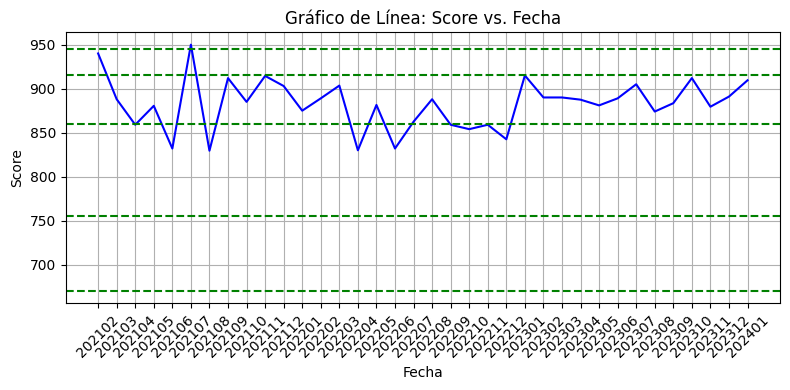

In [ ]:
a = df_final.groupby('begin_date_codmes').agg({'score':'median'}).reset_index()

plt.figure(figsize=(8, 4))  # Tamaño del gráfico
plt.plot(a['begin_date_codmes'], a['score'], linestyle='-', color='b')  # Crear la línea
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Score')  # Etiqueta del eje y
plt.title('Gráfico de Línea: Score vs. Fecha')  # Título del gráfico
plt.grid(True)  # Activar la cuadrícula
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
for valor in [670, 755, 860, 915, 945]:
    plt.axhline(y=valor, color='g', linestyle='--', label=f'Score {valor}')
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el

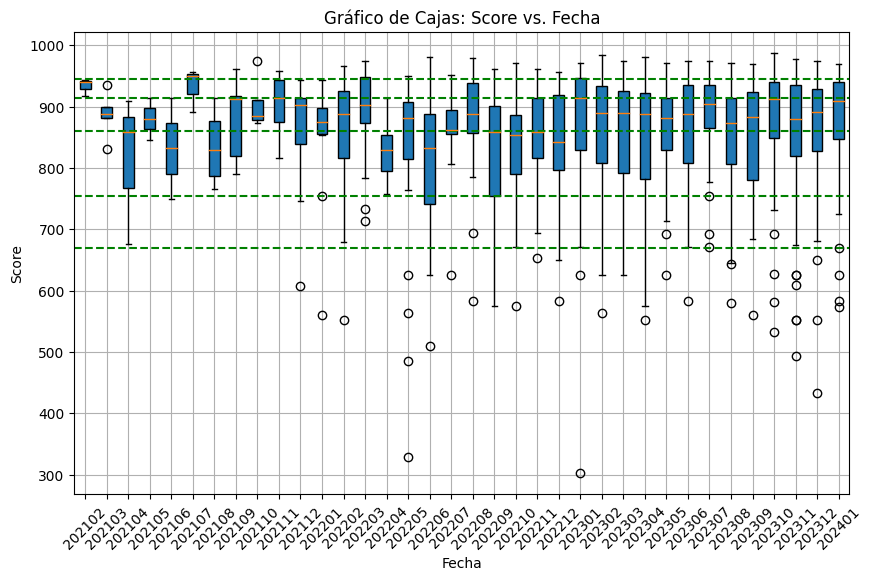

In [ ]:
# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.boxplot([df_final[df_final['begin_date_codmes'] == mes]['score'] for mes in df_final['begin_date_codmes'].unique()],
            labels=df_final['begin_date_codmes'].unique(), patch_artist=True)
plt.gca().invert_xaxis()

# Agregar etiquetas y título al gráfico
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Score')  # Etiqueta del eje y
plt.title('Gráfico de Cajas: Score vs. Fecha')  # Título del gráfico
plt.grid(True)  # Activar la cuadrícula

for valor in [670, 755, 860, 915, 945]:
    plt.axhline(y=valor, color='green', linestyle='--', label=f'Score {valor}')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()